In [ ]:
"""
Download dataset from URL (for Google Colab)
"""
!wget http://th-www.if.uj.edu.pl/~erichter/dydaktyka/Dydaktyka2025/DataScience-2025/kc_house_data.csv.zip
!unzip kc_house_data.csv.zip
!ls

--2025-10-26 14:43:03--  http://th-www.if.uj.edu.pl/~erichter/dydaktyka/Dydaktyka2025/DataScience-2025/kc_house_data.csv.zip
Resolving th-www.if.uj.edu.pl (th-www.if.uj.edu.pl)... 149.156.40.248
Connecting to th-www.if.uj.edu.pl (th-www.if.uj.edu.pl)|149.156.40.248|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 799400 (781K) [application/zip]
Saving to: ‘kc_house_data.csv.zip’

kc_house_data.csv.z 100%[===================>] 780.66K   262KB/s    in 3.0s    

2025-10-26 14:43:07 (262 KB/s) - ‘kc_house_data.csv.zip’ saved [799400/799400]

Archive:  kc_house_data.csv.zip
  inflating: kc_house_data.csv       
kc_house_data.csv  kc_house_data.csv.zip  sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [ ]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:
model.fit(X, y)

#Hint: .fit()

LinearRegression()

**Note:**  
To build a model, we need two datasets:  
- The first contains the input values (features)  
- The second contains the target values (values we want to predict based on features)

After choosing the model type (here - Linear Regression), we use the `fit()` function to train the model - now the model is ready to make predictions.

In this exercise, the model predicts house prices based on living area.



Evaluation:
R2 score: 0.49670880166311393
Mean squared error: 57947526161.288376
Visualization:


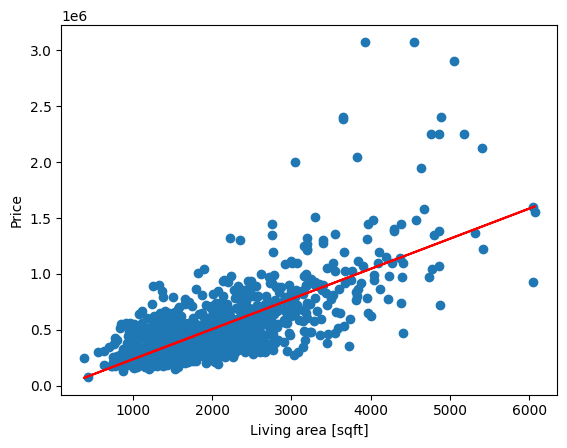

In [ ]:
#b)

#Your code:
y_pred = model.predict(X)

r2_score = model.score(X, y) # for regression models score() returns r2 score
mse = mean_squared_error(y_pred, y)

print("Evaluation:")
print(f"R2 score: {r2_score}")
print(f"Mean squared error: {mse}")

a = model.coef_
b = model.intercept_

print("Visualization:")
plt.scatter(X, y)
plt.xlabel('Living area [sqft]')
plt.ylabel('Price')
plt.plot(X, a*X + b, color='red')
plt.show()

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

**Note:**  
After using the `predict()` function to actually get the predictions, we check how well the model performed using:

- **Evaluation** - a numerical way to compare the real values with the predicted values. Here I used the `score()` function that returns R² score and Mean Squared Error (MSE). For built model we got:
  - R² ≈ 0.5 which means medium performance (0.0 = weak, 1.0 = very good).  
  - MSE depends on the scale of data, however in our case (predicting house prices) it is quite high, so the model could be improved.

- **Visualization** - a plot showing the real data points and the model linear regression line. The line roughly follows the data, but could fit better.


In [ ]:
#c)
models = []
X_orders = []
for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_orders.append(X_order)

    model = LinearRegression()
    model.fit(X_order, y)
    models.append(model)

**Note:**  
To make the line fit the data better, we can use polynomial models, which are more flexible.  
Here, I created 8 models, each with an increasing polynomial degree.

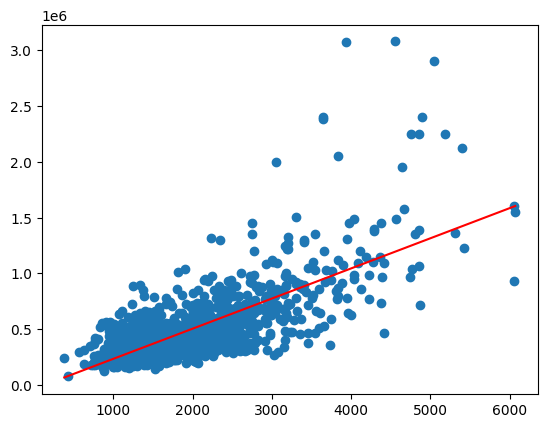

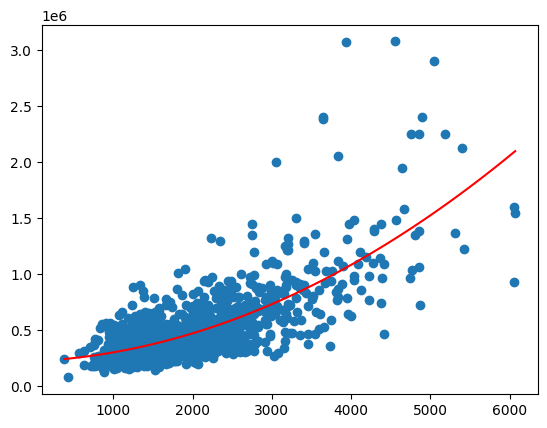

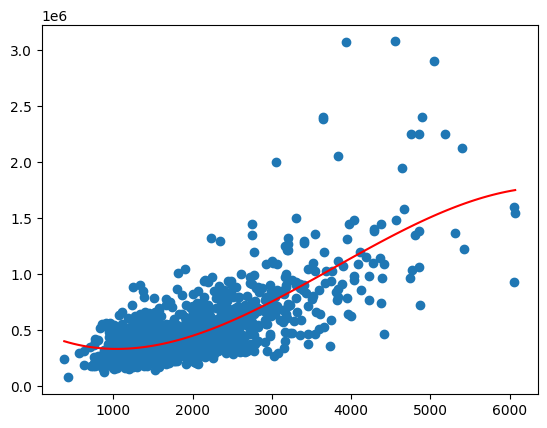

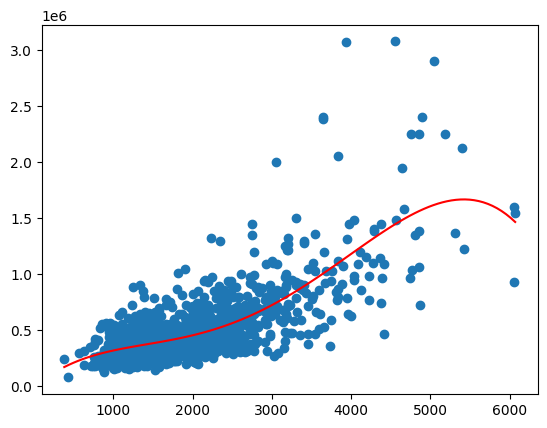

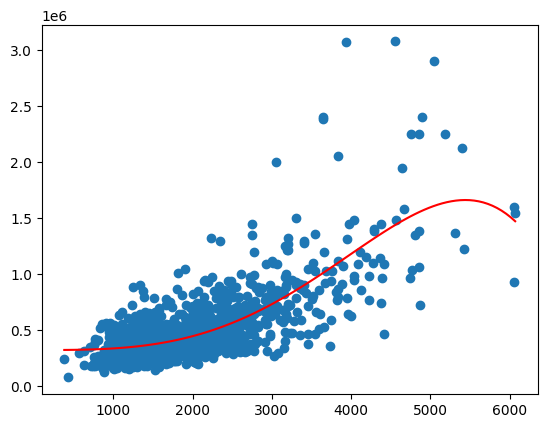

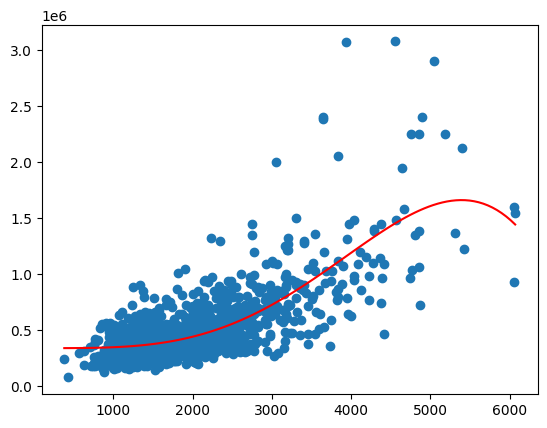

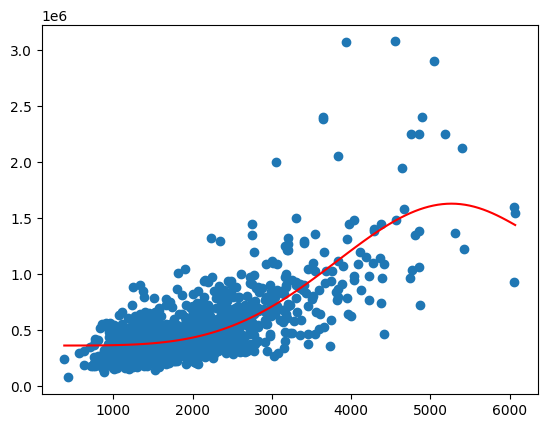

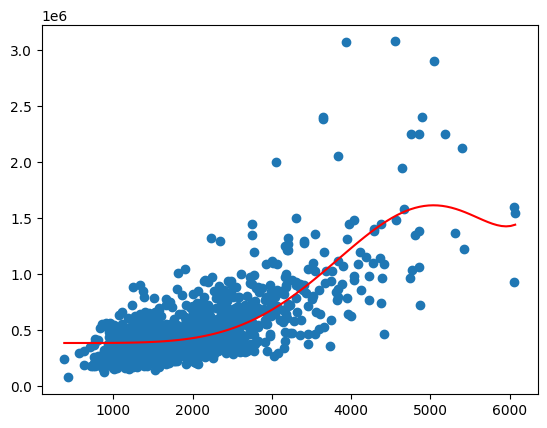

In [ ]:
#Your code:
for order in range(1,9):
    y_pred = models[order-1].predict(X_orders[order-1])

    coefs = models[order-1].coef_
    b = models[order-1].intercept_
    full_list = np.append(coefs[::-1], b)  #::-1 reverses the list, so the coefficients are ordered from highest to lowest degree
    poly = np.poly1d(full_list)

    plt.scatter(X, y)
    X_plot = np.linspace(X.min(), X.max(), 100)
    plt.plot(X_plot, poly(X_plot), color='red')
    plt.show()

**Note:**  
Again, I plotted the models. As we can see the higher-degree polynomials can have more turning points and fit the data better.  
However, too much flexibility can be bad because the model may overfit, wanting to capture extreme values instead of the general trend.


## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

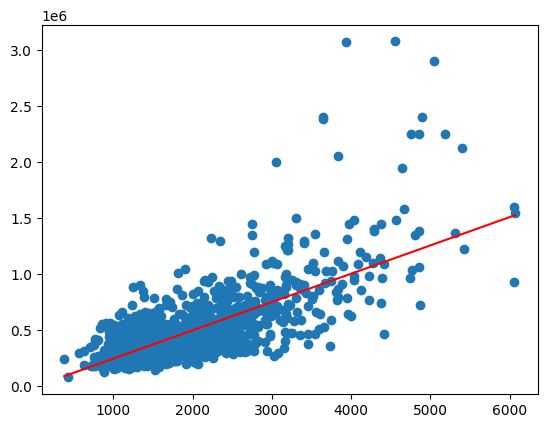

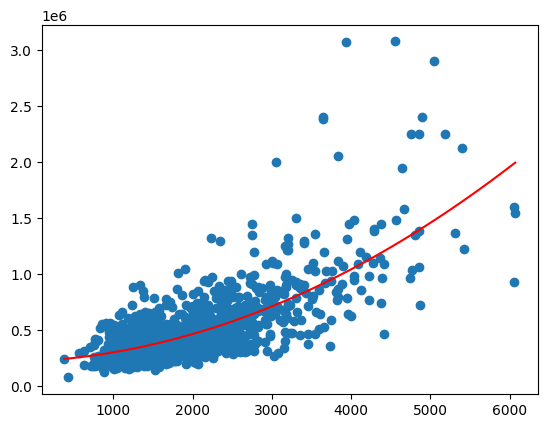

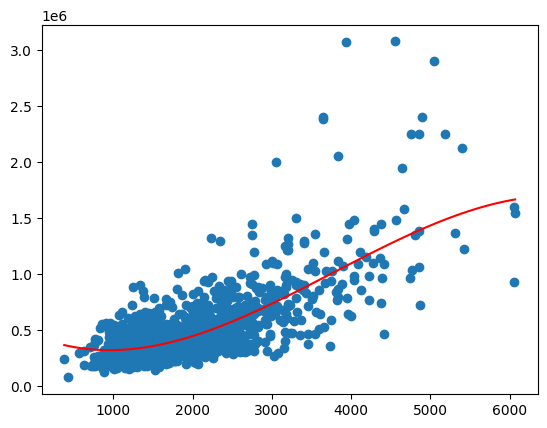

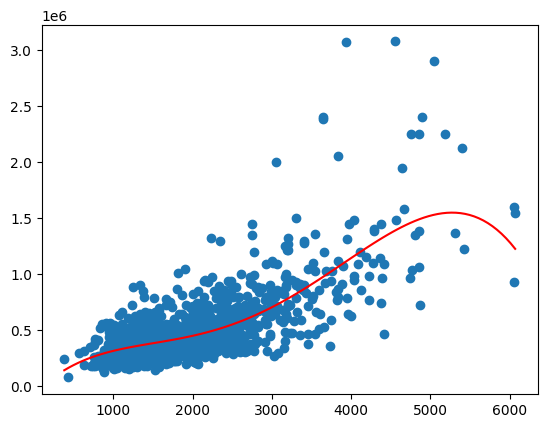

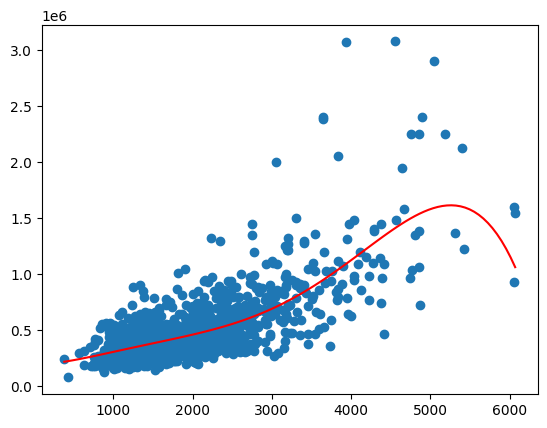

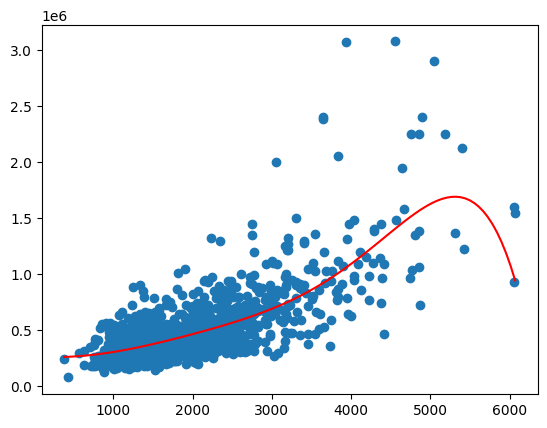

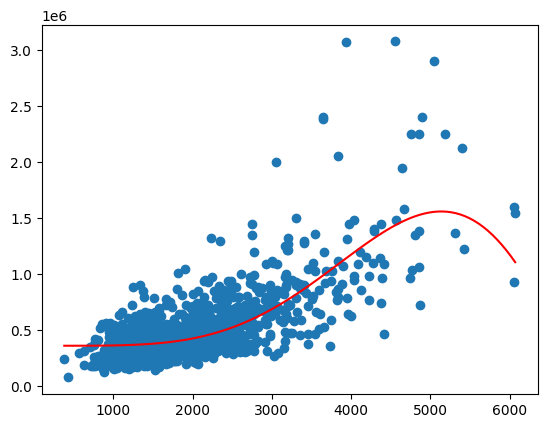

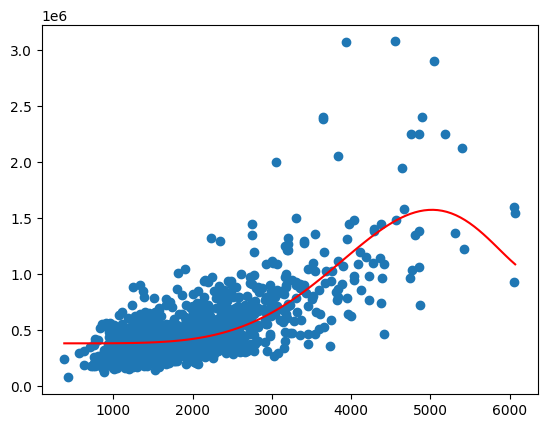

In [ ]:
#a)
training_errors = []
test_errors = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)

    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.5, random_state=43)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    training_error = mean_squared_error(y_train, y_pred)
    training_errors.append(training_error)

    y_pred = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_pred)
    test_errors.append(test_error)

    plt.scatter(X, y)
    coefs = model.coef_
    b = model.intercept_

    full_list = np.append(coefs[::-1], b)
    poly = np.poly1d(full_list)
    X_plot = np.linspace(X.min(), X.max(), 100)

    plt.plot(X_plot, poly(X_plot), color='red')
    plt.show()

**Note:**  
The code is similar to exercise 1c), but here I first split the data into training and test sets. Models were trained on the training set, and then made predictions based on the same set, so I could calculate training MSE.

After that the models predicted on unknown data - test set, and then test MSE was calulcated.

The models were plotted again, but the regression lines look very similar to the previous ones.


In [ ]:
print(training_errors)
print(test_errors)

[55664914616.676544, 52836681211.849266, 52099855745.67757, 50857769204.28969, 50439114025.63811, 50107225424.035614, 51904098712.49766, 53253816563.44889]
[60795370151.2045, 57334205276.09323, 56079708731.82083, 55597305991.38588, 56100293977.43735, 56657020463.87899, 56555509200.87839, 57820958266.04701]


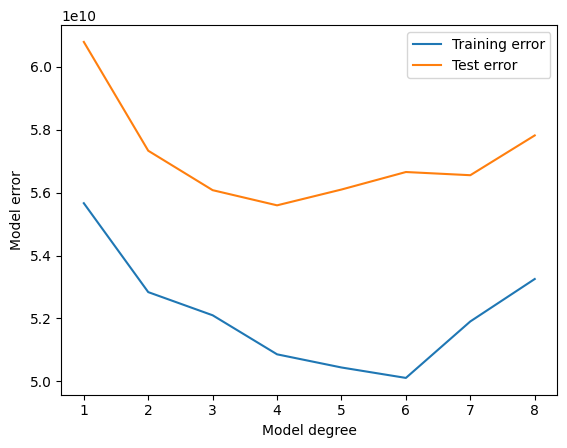

In [ ]:
model_nums = [x for x in range(1, 9)]
plt.plot(model_nums, training_errors)
plt.plot(model_nums, test_errors)
plt.xlabel("Model degree")
plt.ylabel("Model error")
plt.legend(["Training error", "Test error"])
plt.show()

**Note:**  
As expected, the errors are higher on the test set than on the training set, since the model predicts on data it has never seen.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

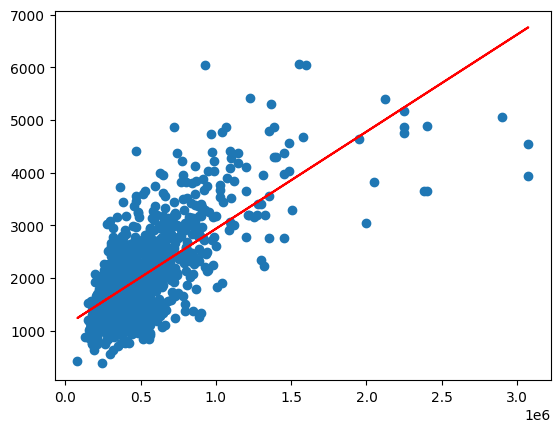

In [ ]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(X, y)
a = model.coef_
b = model.intercept_
plt.plot(X, a*X + b, color='red')
plt.show()

**Note:**  
Here the tables were switched - the model now predicts living area based on house price. However, I would say the regression line fits the data worse than in the original situation.

In [ ]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:


Mean squared error equals: 54053591747.298004


In [ ]:
numerical_house_df = house_df.select_dtypes(include=[np.number])
corelation_matrix = numerical_house_df.corr()
corelation_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [ ]:
X = house_df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']].values.reshape(-1,5)
y = house_df.price.values.reshape(-1)

**Note:**  
First, to propose a better model, I decided to check which variables are most correlated with house price - I've chosen: sqft_living, grade, sqft_above, sqft_living15, and bathrooms.


In [ ]:
X.shape
test_size = 0.25

**Note:**  
Then, I checked my dataset size: it has about 21,000 samples and 5 columns. Since this is a large number, I chose a smaller test set size - 25%.

In [ ]:
#a)
training_errors = []
test_errors = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)

    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=test_size, random_state=43)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    training_error = mean_squared_error(y_train, y_pred)
    training_errors.append(training_error)

    y_pred = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_pred)
    test_errors.append(test_error)

print(training_errors)
print(test_errors)

[60865716252.73598, 50032681228.9408, 47650997963.22145, 46330370935.47467, 44848483745.18413, 44491252703.35028, 47107600146.83643, 49108994160.0029]
[63169679286.0653, 53907509612.89603, 55752890314.9533, 58821761730.64498, 50921298639.96381, 82005640394.35918, 333458902041.1462, 2619394005106.429]


**Note:**  
Since, I was not sure about the best polynomial degree, I built models with different degrees, to choose the model with the smallest MSEs.

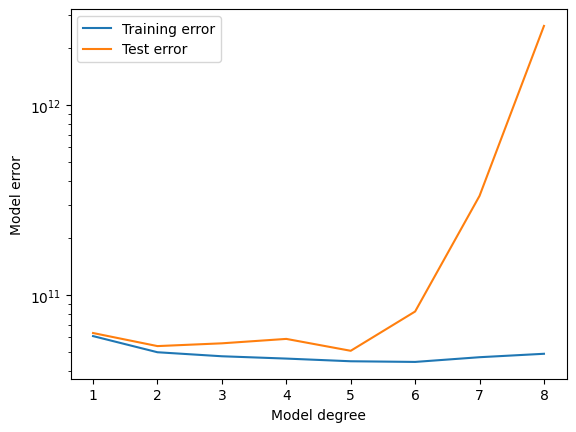

In [ ]:
model_nums = [x for x in range(1, 9)]
plt.plot(model_nums, training_errors)
plt.plot(model_nums, test_errors)
plt.xlabel("Model degree")
plt.ylabel("Model error")
plt.legend(["Training error", "Test error"])
plt.yscale('log') # logarithmic scale because the values vary widely - otherwise the plot looks flat
plt.show()

The best model is the 5th one.

In [ ]:
print(f"5th model MSEs: training: {training_errors[4]}, test: {test_errors[4]}")

5th model MSEs: training: 44848483745.18413, test: 50921298639.96381
